<a href="https://colab.research.google.com/github/ArmeetJatyani/tf-tutorials/blob/main/tf_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification
https://www.tensorflow.org/tutorials/keras/classification

In [ ]:
# import tf
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

# print tf version
print(tf.__version__)

2.4.1


In [ ]:
# import dataset (Fashion MNIST)
fashion_mnist = tf.keras.datasets.fashion_mnist

In [ ]:
# load train images/labels + test images/labels
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
# visualize images and labels
print("Train Images Shape", train_images.shape)
print("Train Labels Shape", train_labels.shape)
print(train_labels, "\n")

print("Test Images Shape", test_images.shape)
print("Test Labels Shape", test_labels.shape)
print(test_labels, "\n")

Train Images Shape (60000, 28, 28)
Train Labels Shape (60000,)
[9 0 0 ... 3 0 5] 

Test Images Shape (10000, 28, 28)
Test Labels Shape (10000,)
[9 2 1 ... 8 1 5] 



In [ ]:
# label 0 = T-shirt/top
# label 1 = Trouser

# define class names class_names[label] = class
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

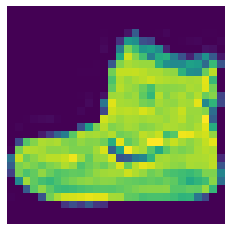

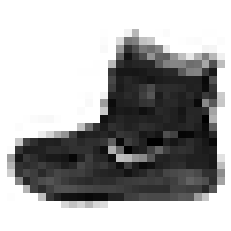

In [ ]:
# show first image in the training data (boot)
plt.figure()
plt.imshow(train_images[0])
plt.grid(False)
plt.axis(False)
plt.show()

# show with cmap=plt.cm.binary
plt.figure()
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.grid(False)
plt.axis(False)
plt.show()

In [ ]:
# normalize the data
# divide every pixel valu eby 255, since all values are between 0 and 255
# resulting values will be from 0 to 1, perfect for the model

train_images = train_images / 255.0
test_images = test_images / 255.0

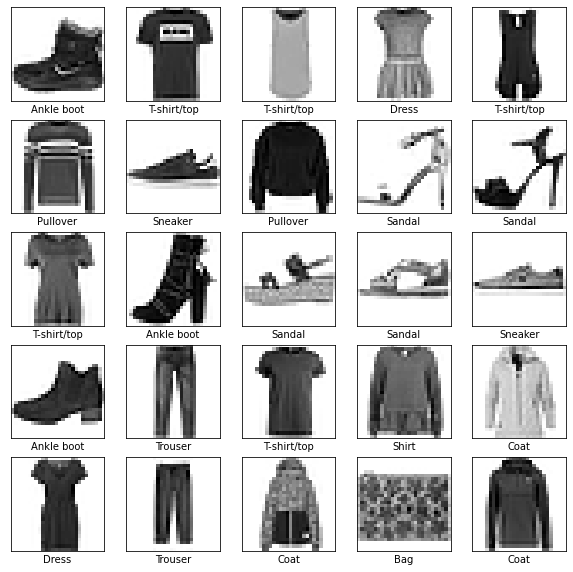

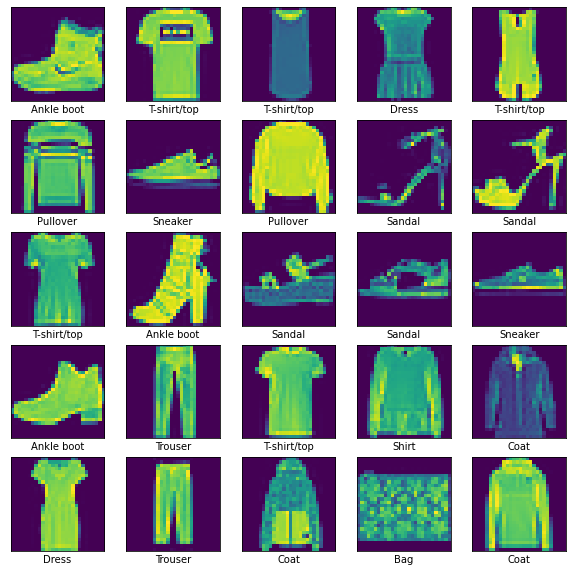

In [ ]:
# now show all the normalized data in a grid
# using cmap=plt.cm.binary
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# using default cmap
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [50]:
# Build Model
# Sequential model
# Layer 1: Flatten
# Layer 2: Dense Layer with relu activation function
# Layer 3: Dense Layer 

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(class_names))
])

print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


In [51]:
# Compile Model
# optimizer: updates the model after observing the performance (loss)
# loss function: measures how accurate or "good" your model is 
# metrics: monitors training/testing in real time

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [52]:
# Train Model
# we are asking our model to learn the association between the pictures and labels
# we use 10 epochs
# higher epoch = more training time

model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6327 - accuracy: 0.7796
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3786 - accuracy: 0.8646
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3455 - accuracy: 0.8738
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3169 - accuracy: 0.8843
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2945 - accuracy: 0.8905
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2802 - accuracy: 0.8969
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2690 - accuracy: 0.8995
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2573 - accuracy: 0.9037
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2502 - accuracy: 0.9053
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.247

In [54]:
# Evaluate Model
# in this step we evaluate how accurate our model is
# use the model.evaluate function, passing in test_images and test_labels
# verbose parameter passes the verbose level we want 

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('Test Accuracy:', test_acc)

313/313 - 0s - loss: 0.3388 - accuracy: 0.8825
Test Accuracy: 0.8824999928474426
